# Stellar Flux
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  09/29/2023          |
| Updated |  10/26/2023          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} = \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} = \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$

## Stellar Properties

The luminosity $L = FA$, where $F$ is the flux and $A$ is the emission surface area.
For an emitting sphere with radius $R$, and $F = \sigma T^4$ (Rybicki & Lightman 1979, eq. 1.43),

$$
  L = \sigma T^4(4\pi R^2).
$$

In [1]:
import numpy as np

# athinput.stellar_flux
# <radiation>
T_unit       = 6.14e3              # T_0 [K]
length_unit  = 5.98e14             # L_0 [cm]

# <problem>
R            = 1.16e-4             # solar radius [L_0]
T            = 9.42e-1             # solar temperature [T_0]
# end athinput.stellar_flux

# physical constants, units
sigma        = 5.67e-5             # [erg/s/cm^2/K^4]
Lsun         = 3.83e33             # [erg/s]
au           = 1.495978707e13      # [cm]
L_au         = length_unit/au      # [au]

Flux = lambda r : sigma*(T*T_unit)**4*(R/r)**2 # stellar flux at distance r
A = 4*np.pi*(R*length_unit)**2                 # stellar surface area [cm^2]
L = Flux(R)*A                                  # stellar luminosity

print(f'       T = {T*T_unit:.0f} K')
print(f'       L = {L/Lsun:.1f} Lsun')
print(f'F( 1 au) = {Flux(1/L_au):.1e} erg/cm^2/s'\
      + f'= {Flux(1/L_au)/1e3:.0f} W/m^2 (solar constant)')
print(f'F(10 au) = {Flux(10/L_au):.1e} erg/cm^2/s'\
      + f'= {Flux(10/L_au)/1e3:.2f} W/m^2')
# Flux at Saturn (~10 au) https://astronomy.stackexchange.com/a/25242/33232

       T = 5784 K
       L = 1.0 Lsun
F( 1 au) = 1.4e+06 erg/cm^2/s= 1364 W/m^2 (solar constant)
F(10 au) = 1.4e+04 erg/cm^2/s= 13.64 W/m^2


## Analytic Solution

### Dust Density Profile

See [Desmos](https://www.desmos.com/calculator/ubtsqj1ltb) for interactive plots of $\rho_\mathrm{mid}$.

\begin{align*}
  \frac{P(r, \theta)}{r} &= \frac{P_0}{r_0}\left(\frac{r\sin\theta}{r_0}\right)^{-1/2} \\
  \rho_\mathrm{mid}(r, \theta) &= \frac{\rho_0\left(\frac{r\sin\theta + r_0}{r_0}\right)^{-9/4}}{1 + \exp\left[-e^e\left(\frac{r\sin\theta - r_0}{r_0}\right)\right]} \\
  \rho(r, \theta) &= \rho_\mathrm{mid}\exp\left[\frac{GMr}{P}\left(\frac{1}{\sqrt{r^2\sin^2\theta + r^2\cos^2\theta}} - \frac{1}{r\sin\theta}\right)\right] \\
                  &= \rho_\mathrm{mid}\exp\left[\frac{GM}{P}\left(1 - \frac{1}{\sin\theta}\right)\right] \\
\end{align*}

κ_a = 558.98169599999994 rho0*L_0


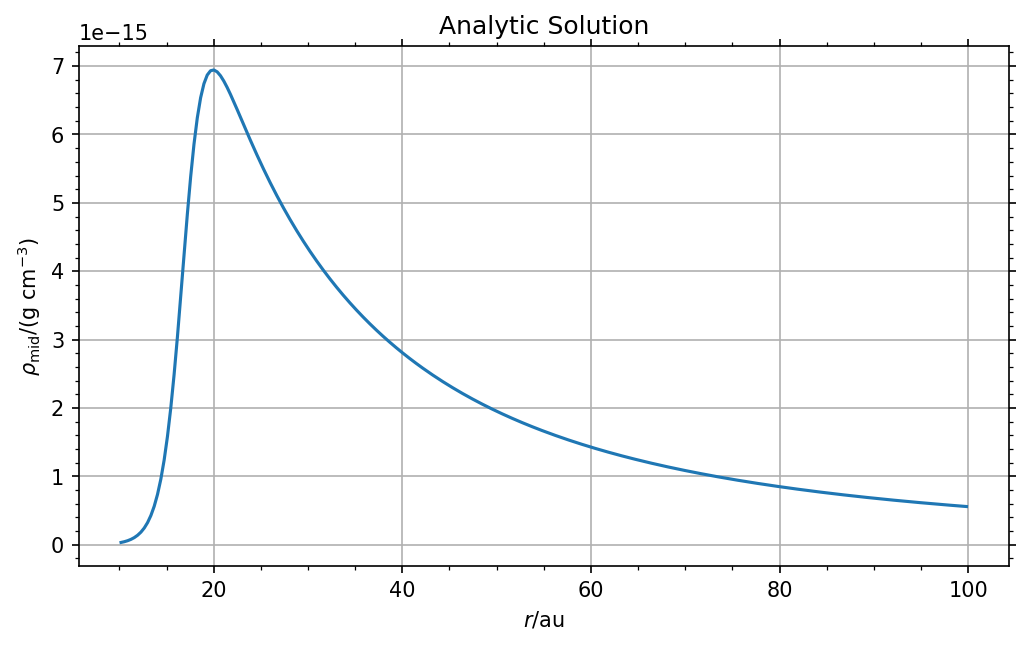

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# begin stellar_flux.cpp
# void Mesh::InitUserMeshData(ParameterInput *pin) {
# // Get parameters for gravitatonal potential of central point mass
gm0 = 1.0 # pin->GetOrAddReal("problem","GM",0.0);

# //---------------------------------------------------------------------------
# //! transform to cylindrical coordinate

def GetCylCoord(x1, x2, x3):
  rad = x1*np.sin(x2)
  phi = x3
  z = x1*np.cos(x2)
  return rad, phi, z

# //---------------------------------------------------------------------------
# //! computes density in cylindrical coordinates

def DenProfileCyl(x1, x2, x3):
  rad, phi, z, = GetCylCoord(x1, x2, x3)
  p_over_r = PoverR(rad, phi, z)
  denmid = rho0*np.power((rad + r0)/r0, dslope)\
           /(1 + np.exp(-np.exp(np.e)*(rad - r0)/r0))
  dentem = denmid*np.exp(gm0/p_over_r*(1./np.sqrt(rad**2 + z**2) - 1./rad))
  den = dentem
  return den

# //---------------------------------------------------------------------------
# //! computes pressure/density in cylindrical coordinates

def PoverR(rad, phi, z):
  poverr = p0_over_r0*np.power(rad/r0, pslope)
  return poverr
# end stellar_flux.cpp

# extra quantities
kappa_star_cgs    = 10             # [cm^2/g]
dgratio           = 100            # dust-to-gas ratio
small_grain_ratio = 0.02184

# begin athinput.stellar_flux
# <mesh>
nx1          = 256                 # Number of zones in X1-direction
x1min        = 0.250163663377926   # minimum value of X1
x1max        = 2.501636633779264   # maximum value of X1

nx2          = 512                 # Number of zones in X2-direction
x2min        = 0                   # minimum value of X2
x2max        = 3.141592653589793   # maximum value of X2

# <hydro>
dfloor       = 1e-12               # minimum density

# <radiation>
prat         = 1.13e3              # $a_rT_0^4/P_0$
crat         = 6.36e4              # $c/v_0$
T_unit       = 6.14e3              # T_0 [K]
density_unit = 4.28e-14            # \rho_0 [g/cm^3]
length_unit  = 5.98e14             # L_0 [cm]

# <problem>
r0           = 0.425278227742474   # radial normalization (17/L_au)
rho0         = 1.0                 # [\rho_0]
p0_over_r0   = 4.80e-03
pslope       = -0.5                # pressure power-law index
dslope       = -2.25               # density power-law index
kappa_a      = 558.98169599999994  # absorption opacity
R            = 1.16e-4             # stellar radius [L_0]
T            = 9.42e-1             # stellar temperature [T_0]
# end athinput.stellar_flux

kappa_star = kappa_star_cgs*dgratio*small_grain_ratio*density_unit*length_unit
print(f'κ_a = {kappa_star:.14f} rho0*L_0')

# conversions
au           = 1.495978707e13      # [cm]
L_au         = length_unit/au      # [au]
rad2deg      = 180/np.pi

# Construct mesh
x1f, x2f = np.linspace(x1min, x1max, nx1+1), np.linspace(x2min, x2max, nx2+1)
x1v, x2v = (x1f[:-1] + x1f[1:])/2, (x2f[:-1] + x2f[1:])/2
x1mesh, x2mesh = np.meshgrid(x1v, x2v)
rho_field = DenProfileCyl(x1mesh, x2mesh, 0)
rho_field[rho_field < dfloor] = dfloor
dtheta = (x2max - x2min)/nx2
theta_mid_deg = 90
j_mid = int(theta_mid_deg/rad2deg/dtheta)

# Plot
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)
ax.plot(x1v*L_au, rho_field[j_mid, :]*density_unit)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(title='Analytic Solution', xlabel='$r$/au',
       ylabel=r'$\rho_\mathrm{mid}$/(g cm$^{-3}$)')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('figs/frame.jpg', bbox_inches='tight')

### Optical Depth, Specific Intensity, Radial Flux

From Rybicki & Lightman (1979), we define the *optical depth* along a ray in the radial direction $r$ at polar angle $\theta$ as
\begin{align*}
  \mathrm{d}\tau &\equiv \alpha\mathrm{d}r \\
  \tau(r, \theta) &= \int_{r_0}^r \alpha(r', \theta)\mathrm{d}r', \tag{1.26}
\end{align*}
where we define the *absorption coefficient* $[\mathsf{L}^{-1}]$ as
$$
\alpha(r, \theta) \equiv \rho\kappa_\mathrm{a},
\tag{1.22}
$$
for mass density $\rho(r, \theta)$ and *opacity* coefficient $\kappa_\mathrm{a}$ $[\mathsf{L}^2\mathsf{M}^{-1}]$.
With these, we can express the radiative transfer equation (1.23)—for absorption only—in terms of the optical depth as
$$
  \frac{\mathrm{d}I}{\mathrm{d}\tau} = -I
$$
with the solution
$$
  I(\tau) = I(0)e^{-\tau}.
$$
For *blackbody radiation* from a surface of uniform brightness $B$ at temperature $T$ (Rybicki & Lightman 1979, eq. 1.42)
$$
  I(0) = B(T) = \frac{a_\mathrm{r}c}{4\pi}T^4.
$$
The flux $F$ at a radial distance $r$ from a sphere of uniform brightness $B$ and with radius $R$ is (cf. Rybicki & lightman 1979, eq. 1.13)
\begin{align*}
  F &= \pi B\left(\frac{R}{r}\right)^2e^{-\tau} \\
    &= \sigma T^4\left(\frac{R}{r}\right)^2e^{-\tau},
\end{align*}
where the Stefan–Boltzmann constant ($\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{cm}^{-2}\,\mathrm{K}^{-4}$) is defined as (Rybicki & lightman 1979, eq. 1.44a)
\begin{align*}
  \sigma &\equiv \frac{a_\mathrm{r}c}{4} \\
         &= \frac{\mathbb{P} P_0 \mathbb{C} v_0}{4T_0^4}.
\end{align*}

In [3]:
k_B = 1.38e-16  # Boltzmann constant [erg/K]
m_p = 1.67e-24  # proton mass [g]
mu = k_B*T_unit/m_p*(sigma*4*T_unit**4/prat/crat/rho0)**(-2/3)
P_0 = k_B*rho0*T_unit/mu/m_p
v_0 = np.sqrt(k_B*T_unit/mu/m_p)

print(f'μ = {mu:.2e}')
print(f'σ = {prat*P_0*crat*v_0/4/T_unit**4:.2e} erg/s/cm^2/K^4')

μ = 1.87e+09
σ = 5.67e-05 erg/s/cm^2/deg^4


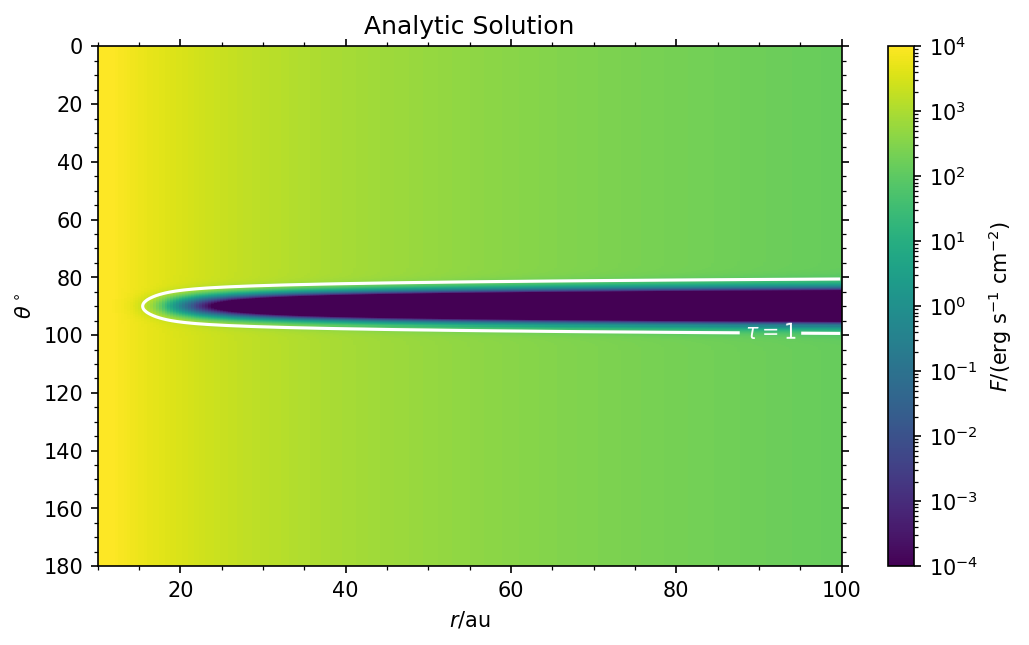

In [12]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt

def fmt(x):
  return rf'$\tau={x:.0f}$'

rad2deg = 180/np.pi
dr = (x1max - x1min)/nx1
dtau = rho_field*kappa_a*dr
tau_field  = np.cumsum(dtau, axis=1)
F = sigma*np.power(T*T_unit, 4)*np.power(R/x1v,2)*(np.exp(-tau_field))

# Plot and format
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)
vmin, vmax = 1e-4, 1e4
clip = np.clip(F, vmin, vmax)
im = ax.pcolormesh(x1v*L_au, x2v*rad2deg, clip, norm=colors.LogNorm())
CS = ax.contour(x1v*L_au, x2v*rad2deg, tau_field, [1, 1e4],
                 colors=['white', 'white'])
cb_F = plt.colorbar(im, label='$F$/(erg s$^{-1}$ cm$^{-2}$)')

ax.clabel(CS, CS.levels, fmt=fmt)
ax.invert_yaxis()
ax.minorticks_on()
ax.set(title='Analytic Solution', xlabel='$r$/au', ylabel=r'$\theta^\circ$')
ax.tick_params(axis='both', which='both', top=True, right=True)


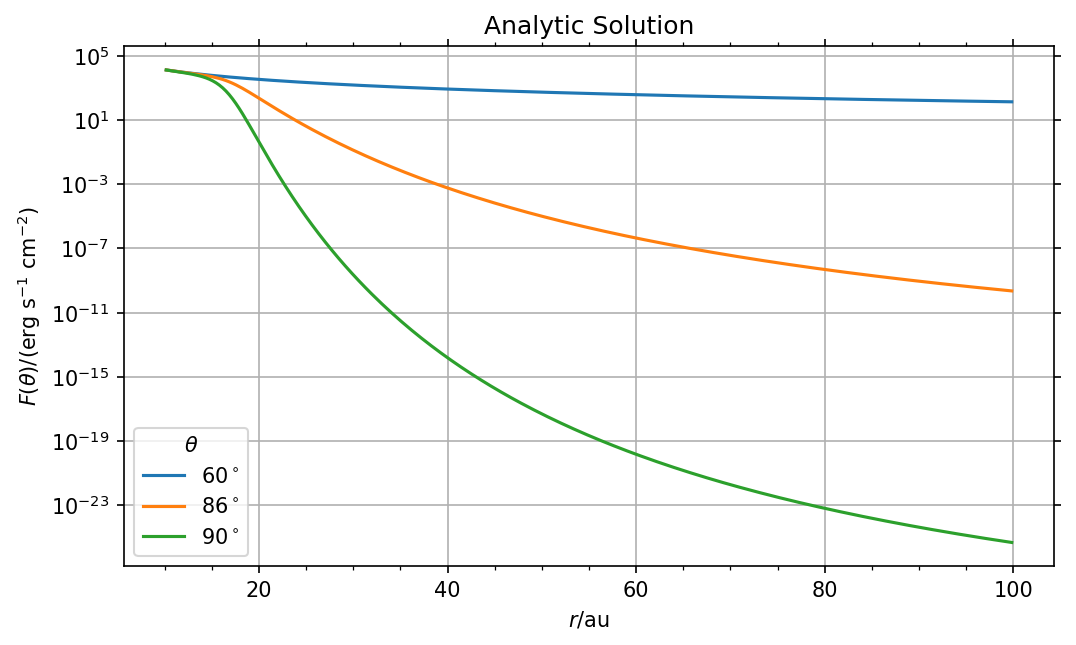

In [13]:
# Plot cuts
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)
dtheta = (x2max - x2min)/nx2
theta_degs = [60, 86, 90]
rad2deg = 180/np.pi

for theta_deg in theta_degs:
  j = int(theta_deg/rad2deg/dtheta)
  ax.plot(x1v*L_au, F[j, :], label=rf'{theta_deg}$^\circ$')

# Format (sub)plots
ax.grid()
ax.legend(title=r'$\theta$')
ax.minorticks_on()
ax.set(title='Analytic Solution', xlabel='$r$/au', yscale='log',# ylim=(1e-6, 1e1),
       ylabel=r'$F(\theta)/($erg s$^{-1}$ cm$^{-2}$)')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('figs/frame.jpg', bbox_inches='tight')

In [6]:
print(f'F(10 au) = {F[j, 0]:.1e} erg/cm^2/s = {F[j, 0]/1e3:.02f} W/m^2')

F(10 au) = 1.3e+04 erg/cm^2/s = 13.13 W/m^2


## Athena++

/home/stanley/github/PrincetonUniversity/athena/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


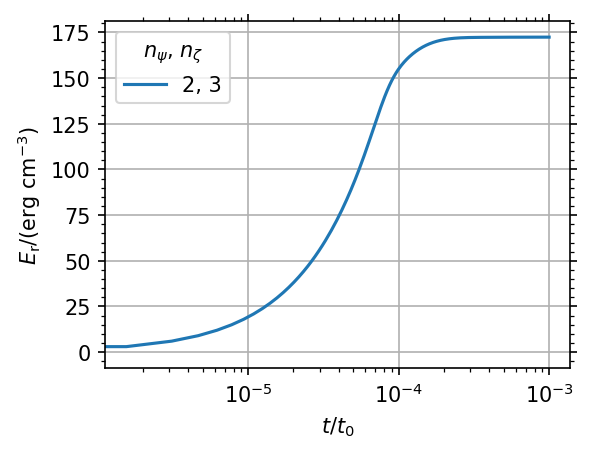

In [7]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt

problem_id = 'stellar_flux'
npsis_nzetas = [[2, 3],]
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

# Read and plot
for npsi_nzeta in npsis_nzetas:
    npsi, nzeta = npsi_nzeta[0],npsi_nzeta[1]
    path = f'npsi{npsi}/nzeta{nzeta}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    cfl_number = athinput['time']['cfl_number']
    prat = athinput['radiation']['prat']
    crat = athinput['radiation']['crat']
    hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
    time, Er = hst['time'], hst['Er']

    ax.semilogx(time, prat*crat*Er, label=f'{npsi}, {nzeta}')

# Format (sub)plots
ax.grid()
ax.legend(title=r'$n_\psi$, $n_\zeta$')
ax.minorticks_on()
ax.set(xlabel='$t/t_0$', ylabel=r'$E_\mathrm{r}$/(erg cm$^{-3}$)')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig(f'NAME.jpg', bbox_inches='tight', pad_inches=0.01)

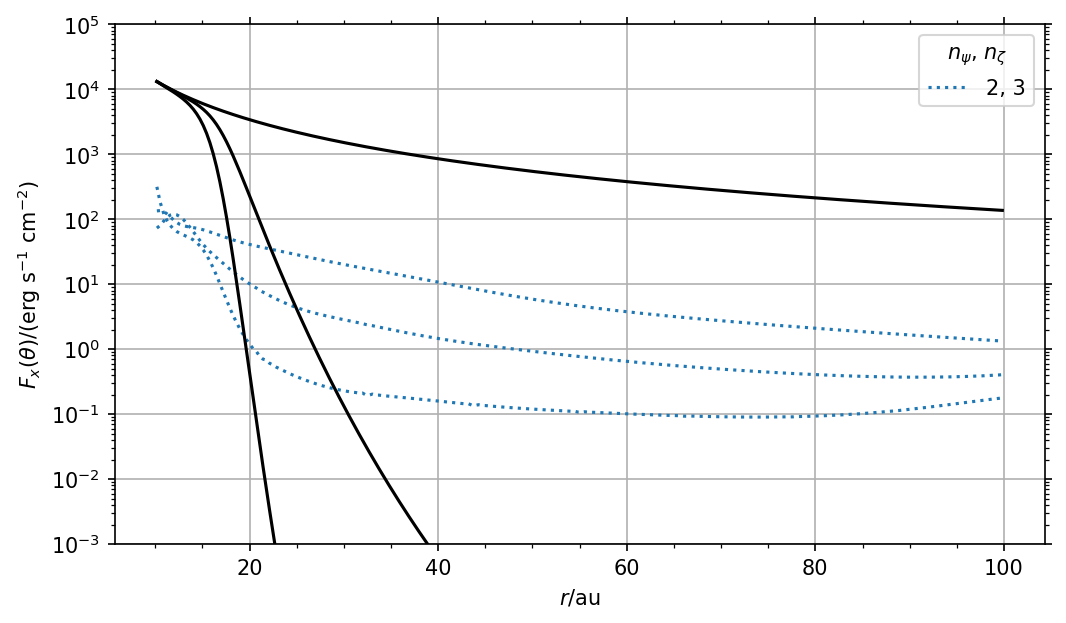

In [8]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

# conversions
au = 1.495978707e13 # [cm]
rad2deg = 180/np.pi

problem_id = 'stellar_flux'
npsis_nzetas = [[2, 3],]
# npsis = [2, 4, 6, 8]
# nzetas = [3, 5, 10, 20]
colors = ['tab:blue',] #'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
lss = ['dotted', 'dashed', 'dashdot']
theta_degs = [60, 86, 90]
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)

# Read and plot Athena++ runs
for i, npsi_nzeta in enumerate(npsis_nzetas):
    npsi, nzeta = npsi_nzeta[0],npsi_nzeta[1]
    path = f'npsi{npsi}/nzeta{nzeta}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
    uov = athena_read.athdf(f'{path}/athdf/{problem_id}.out3.00001.athdf')
    prat = athinput['radiation']['prat']
    crat = athinput['radiation']['crat']
    length_unit = athinput['radiation']['length_unit']
    L_au = length_unit/au
    dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
             /athinput['mesh']['nx2']
    Fr1 = prat*crat*athdf['Fr1'][0]#*10**2.5 # offset

    for theta_deg in theta_degs:
        j = int(theta_deg/rad2deg/dtheta)
        ax.plot(athdf['x1v']*L_au, Fr1[j, :], ls=':', color=colors[i])

    ax.plot([], [], color=colors[i], ls=':', label=f'{npsi}, {nzeta}')

# Plot analytic solution
for theta_deg in theta_degs:
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(x1v*L_au, F[j, :], color='black')

# Plot ghost points for colorless line style and add legends
ax.legend(title=r'$n_\psi$, $n_\zeta$')

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel='$r$/au', yscale='log', ylim=(1e-3, 1e5),
       ylabel=r'$F_x(\theta)/($erg s$^{-1}$ cm$^{-2}$)')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('figs/frame.jpg', bbox_inches='tight')

In [9]:
uov

{'Coordinates': b'spherical_polar',
 'DatasetNames': array([b'user_out_var'], dtype='|S21'),
 'MaxLevel': 0,
 'MeshBlockSize': array([32, 32,  1], dtype='>i4'),
 'NumCycles': 644,
 'NumMeshBlocks': 128,
 'NumVariables': array([24], dtype='>i4'),
 'RootGridSize': array([256, 512,   1], dtype='>i4'),
 'RootGridX1': array([0.25016366, 2.50163663, 1.        ]),
 'RootGridX2': array([0.        , 3.14159265, 1.        ]),
 'RootGridX3': array([0.        , 3.14159265, 1.        ]),
 'Time': 0.001,
 'VariableNames': array([b'user_out_var0', b'user_out_var1', b'user_out_var2',
        b'user_out_var3', b'user_out_var4', b'user_out_var5',
        b'user_out_var6', b'user_out_var7', b'user_out_var8',
        b'user_out_var9', b'user_out_var10', b'user_out_var11',
        b'user_out_var12', b'user_out_var13', b'user_out_var14',
        b'user_out_var15', b'user_out_var16', b'user_out_var17',
        b'user_out_var18', b'user_out_var19', b'user_out_var20',
        b'user_out_var21', b'user_out_var2

In [10]:
uov['user_out_var0'][0][:,0].size

512

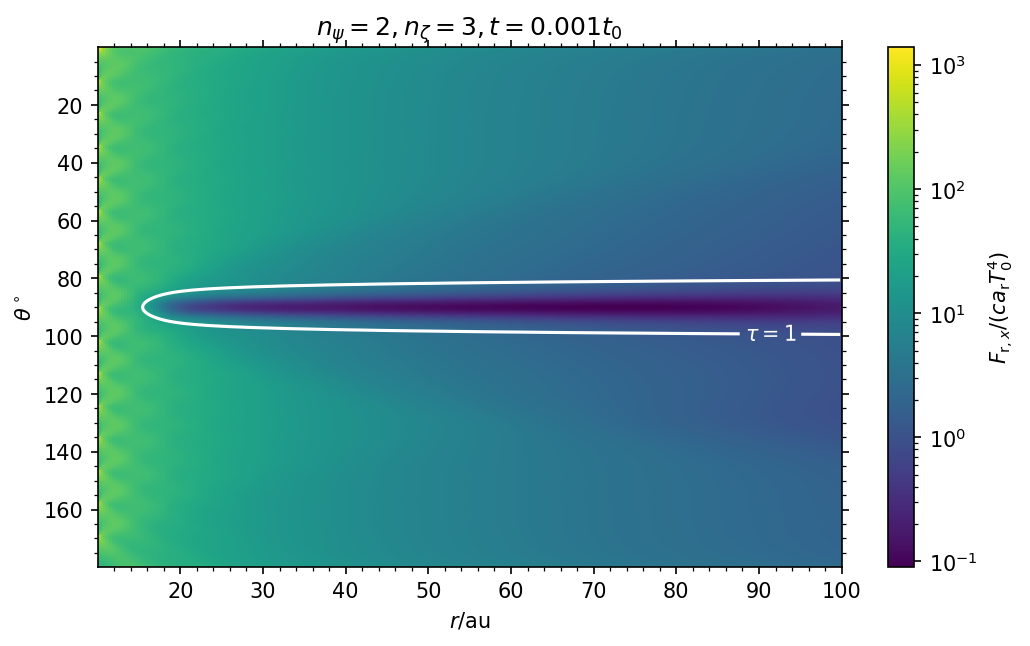

In [11]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# conversions
au = 1.495978707e13 # [cm]
rad2deg = 180/np.pi

problem_id = 'stellar_flux'
npsi = 2
nzeta = 3
error_limit = '1e-6'
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)

# Read and plot
path = f'npsi{npsi}/nzeta{nzeta}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
prat = athinput['radiation']['prat']
crat = athinput['radiation']['crat']
length_unit = athinput['radiation']['length_unit']
L_au = length_unit/au
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
t = athdf['Time']
Fr1 = prat*crat*athdf['Fr1'][0]
im = ax.pcolormesh(athdf['x1v']*L_au, athdf['x2v']*rad2deg, Fr1,
                   norm=colors.LogNorm())
dr = (athinput['mesh']['x1max'] - athinput['mesh']['x1min'])\
     /athinput['mesh']['nx1']
dtau = athdf['Sigma_a_0'][0]*dr
tau_field  = np.cumsum(dtau, axis=1)
CS = ax.contour(athdf['x1v']*L_au, athdf['x2v']*rad2deg, tau_field, [1, 1e4],
                colors=['white', 'white'])

# Format (sub)plots
cb_F = plt.colorbar(im, label='$F_{\mathrm{r},x}/(ca_\mathrm{r}T_0^4)$')

ax.clabel(CS, CS.levels, fmt=fmt)
ax.minorticks_on()
ax.set_title(rf'$n_\psi={npsi}, n_\zeta={nzeta}, t={t:.3f}t_0$')
ax.set(xlabel='$r$/au', ylabel=r'$\theta^\circ$')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.gca().invert_yaxis()
# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')